# Exercise: Pipeline

In this exercise, we aim to train a pipeline along with parameter tuning and perform prediction with the best model. More specifically, we accomplish the following tasks: 

1. Develop a pipeline with feature extraction and linear regression models  
2. Perform grid search with the pipeline for optimizing some hyperparameters
3. Evaluate the best model's performance
4. Identify the second best model 


The dataset we will be using is face dataset.

## Face Data

(from SciKit Learn Docs)

This dataset is a collection of JPEG pictures of famous people collected over the internet, 
all details are available on the official website:

  *  http://vis-www.cs.umass.edu/lfw/

Each picture is centered on a single face. 
The typical task is called Face Verification: 
given a pair of two pictures, 
a binary classifier must predict whether the two images are from the same person.

An alternative task, 
Face Recognition or Face Identification is: 
given the picture of the face of an unknown person, 
identify the name of the person by referring to a gallery of previously seen pictures of identified persons.

Both Face Verification and Face Recognition are tasks that are typically 
performed on the output of a model trained to perform Face Detection. 
The most popular model for Face Detection is called Viola-Jones and is 
implemented in the OpenCV library. 
The LFW faces were extracted by this face detector from various online websites.

---

# Import libs

In [1]:
# Import all the libs you need:

from time import time
import matplotlib.pyplot as plt
import pandas as pd

## LOAD necessary libraries
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression


# Load the Dataset
Load the dataset from sklearn datasets using `fetch_lfw_people`. Print the number of samples, features, and  classes.

In [2]:
# load the dataset:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)


Total dataset size
n_samples: 1288
n_features: 1850
n_classes: 7


# Visualize Some Sample Images
Randomly sample 9 images from the dataset and visualize them in a 3X3 grid with their labels. 

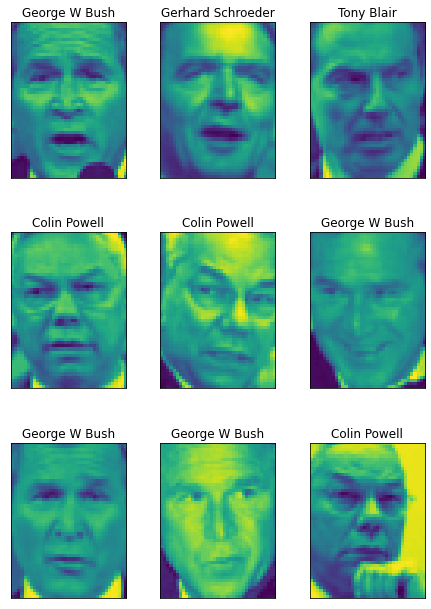

In [3]:
# visualize using matplot lib

from matplotlib import pyplot
import numpy as np

row = 3
col = 3
total_sample = len(lfw_people.data)

pyplot.subplots_adjust(bottom=0, left=.01, right=.99, top=2, hspace=.35)


for i in range(row*col):
    pyplot.subplot(row, col, i+1)
    random_index = np.random.randint(0, total_sample)
    single_label = np.copy(lfw_people.data[random_index, :])
    single_label = single_label.reshape((h,w))
    pyplot.title(target_names[lfw_people.target[random_index]], size=12)
    pyplot.xticks(())
    pyplot.yticks(())
    pyplot.imshow(single_label)

# Split the dataset
Split the dataset into train (75%) and test (25%).

In [4]:
# split the dataset (E001)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Build a Pipeline

Now, we build a pipeline that performs feature extraction with PCA followed by classification using logistic regression. While developing the pipeline, we perform the following tasks. 

1. For PCA, vary the `n_components` parameter and for logistic regression, vary the regularization parameter `C`. Use at least 5 different values for each of these parameters. 
2. Use 10-fold cross validation while using the gridsearch


Note: If LogisticRegression doesn't converge, increase the value for `max_iter`. 

## Define the pipeline


In [8]:
# Define the pipeline (E002)
pipe = Pipeline([
     ('PCA', PCA()),
     ('LR', LogisticRegression(max_iter=10000))
    ])

## Configure the Parameters for Grid Search

In [9]:
# Configure the parameters for grid search (E003)
param_grid = {
    'PCA__n_components': [10,25,50,100,150],
    'LR__C': [0.01, 0.1, 1, 10, 100]}

## Train the Pipeline with Grid Search

In [ ]:
# Train the Pipeline with Grid Search (E004)
model_grid = GridSearchCV(pipe, param_grid=param_grid, cv=10)
model_grid.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Once the pipeline is fitted, we can address the following tasks. 

## Show the parameters of the trained models and their rankings within this pipeline

In [ ]:
# Show the parameters of the trained models and their rankings in a table (E005)
cv_results_df = pd.DataFrame(model_grid.cv_results_)
cv_results_df = cv_results_df.sort_values('rank_test_score')
cv_results_df[['params', 'mean_test_score', 'rank_test_score']]
# cv_results_df

## Show the parameters of the best model

In [ ]:
# Show the best model's parameters (E006)
print("Best parameters found by grid search:")
print(model_grid.best_params_)
print("Best estimator found by grid search:")
print(model_grid.best_estimator_)

## Show the parameters of the second best model

In [ ]:
# Show the parameters of the second best model (E007)
# cv_results_df.iloc[1]
print('Rank: ', cv_results_df.iloc[1].rank_test_score)
print('Parameters: ',cv_results_df.iloc[1].params)

## Show the mean and stddev of the test scores (i.e CV scores) for the second best model

In [ ]:
# Show the mean and stddev of the test scores (i.e CV scores) for the second best model (E008)
print('Rank: ', cv_results_df.iloc[1].rank_test_score)
print('mean_test_score: ',cv_results_df.iloc[1].mean_test_score)
print('stddev_test_score: ',cv_results_df.iloc[1].std_test_score)

## Evaluate the best model using the test data

Perform the following tasks: 

1. Make prediction
1. Show confusion matrix
1. Show classification task

In [ ]:
# Make prediction (E009)
predicted_y = model_grid.predict(X_test)

In [ ]:
# Show confusion matrix (E010)
print(confusion_matrix(y_test, predicted_y))

In [ ]:
# Show the classification report (E011)
print(classification_report(y_test, predicted_y))

# Save your Notebook, then `File > Close and Halt`